## Import Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

## Define Objective Function

In [15]:
# objective function
def f(x, y):
    return x**2 + y**2 + 1

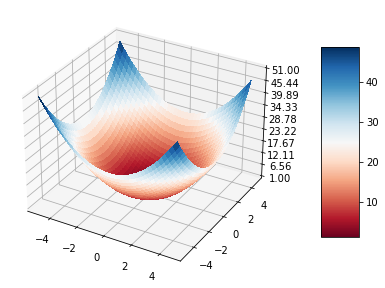

In [16]:
x = np.arange(-5, 5, .25)
# x = np.arange(-10, 10, 0.1)
y = np.arange(-5, 5, .25)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# visualize the objective function
fig = plt.figure(1, figsize = (15, 5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

In [17]:
# visualization function
def contour_plot(x_seq, y_seq, init):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(init[0],init[1],'ro')
    
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

## Gradient Descent

In [119]:
# partial derivative
def dfdx(x, y):
    return 2 * x

def dfdy(x, y):
    return 2 * y

def derivative(x, y):
    return np.array([dfdx(x, y), dfdy(x, y)])

In [132]:
def gradient_descent(df, x_init, lr):

    eps = 0.0001
    iter = 0
    seq_x = []
    seq_y = []
    losses = []

    while True:

        iter += 1
        fn = f(x_init[0], x_init[1])

        # gradient
        gradient = df(x_init[0], x_init[1])

        # update step
        x_init = x_init - (lr * gradient)

        # record step
        seq_x = np.append(seq_x, x_init[0])
        seq_y = np.append(seq_y, x_init[1])

        # loss
        loss = np.abs(fn - f(x_init[0], x_init[1]))        
        losses.append(loss)        

        if loss <= eps:
            break

    return (losses, x_init, iter, seq_x, seq_y)

Minimum loss: 4.366892241391973e-05
Minimum number (x, y) from gradient descent: [0.00470185 0.00156728]
Number of gradient descent iteration: 14


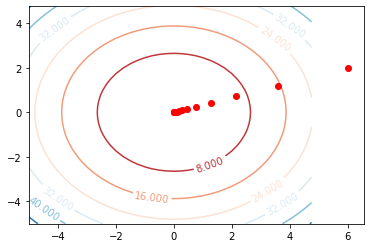

In [135]:
# define initial point
init = np.array([6, 2])
gd = gradient_descent(derivative, init, .2)

print(f'Minimum loss: {gd[0][-1]}')
print(f'Minimum number (x, y) from gradient descent: {gd[1]}')
print(f'Number of gradient descent iteration: {gd[2]}')

contour_plot(gd[3], gd[4], init)

## Gradient Descent with Momentum

In [20]:
def gradient_descent_momentum(df, x_init, lr, beta=0.9):
    
    # threshold
    eps = 0.0001

    iter = 1
    seq_x = []
    seq_y = []

    # initial step
    moment = (1 - beta) * df(x_init[0], x_init[1])

    # update initial step
    x_next = x_init - lr * moment

    # record step coordinate x and y
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])

    # iterate until reach threshold
    while np.linalg.norm(x_next - x_init) > eps:

        # update previous points
        x_init = x_next

        # calculate next moment
        moment = (beta * moment) + ((1 - beta) * df(x_init[0], x_init[1]))

        # generate next point
        x_next = x_init - lr * moment

        iter += 1

        # record every step coordinate x and y
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    return (x_next, iter, seq_x, seq_y)


Minimum (x, y) from gradient descent w/ moment: [-0.09342981 -0.03114327]
Number of gradient descent w/ moment iteration: 79


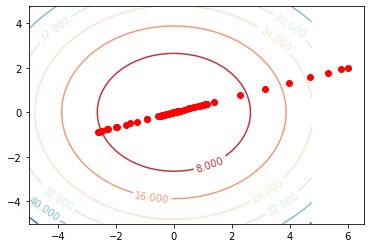

In [21]:
gdm = gradient_descent_momentum(derivative, init, .2)

print(f'Minimum (x, y) from gradient descent w/ moment: {gdm[0]}')
print(f'Number of gradient descent w/ moment iteration: {gdm[1]}')

contour_plot(gdm[2], gdm[3], init)

## RMSprop

In [22]:
def RMSprop(df, x_init, lr, beta=0.9, constant=1e-6):
    
    # threshold
    eps = 0.0001

    iter = 1
    seq_x = []
    seq_y = []

    # initial step
    gradient = df(x_init[0], x_init[1])    
    moment = (1 - beta) * (gradient ** 2)    

    # update initial step
    x_next = x_init - lr * gradient / (np.sqrt(moment) + constant)    

    # record step coordinate x and y
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
        
    # iterate until reach threshold
    while np.linalg.norm(x_next - x_init) > eps:    

        # update previous points
        x_init = x_next

        # calculate next moment
        gradient = df(x_init[0], x_init[1])
        moment = (beta * moment) + ((1 - beta) * (gradient ** 2))

        # generate next point
        x_next = x_init - lr * gradient / (np.sqrt(moment) + constant)

        iter += 1

        # record every step coordinate x and y
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])        

    return (x_next, iter, seq_x, seq_y)

Minimum number (x, y) from RMSprop: [7.00802188e-05 8.78653214e-15]
Number of RMSprop iteration: 58


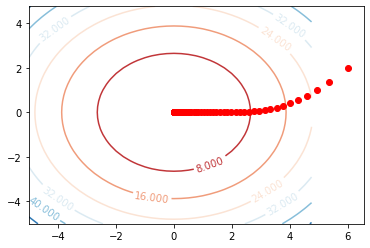

In [23]:
rmsprop = RMSprop(derivative, init, .2)

print(f'Minimum number (x, y) from RMSprop: {rmsprop[0]}')
print(f'Number of RMSprop iteration: {rmsprop[1]}')

contour_plot(rmsprop[2], rmsprop[3], init)

## Adam

In [133]:
def Adam(df, x_init, lr, beta1=0.9, beta2=0.999, constant=1e-8):

    # threshold
    eps = 0.0001

    iter = 0
    moment = 0
    rmsprop = 0
    losses = []
    seq_x, seq_y = [], []    

    while True:

        iter += 1 
        fn = f(x_init[0], x_init[1])        

        # calculate gradient
        gradient = df(x_init[0], x_init[1])  

        # moment, rmsprop
        moment = (beta1 * moment) + ((1 - beta1) * gradient)
        rmsprop = (beta2 * rmsprop) + ((1 - beta2) * np.power(gradient, 2))

        # corrected
        moment_corr = moment / (1 - np.power(beta1, iter))
        rmsprop_corr = rmsprop / (1 - np.power(beta2, iter))

        # update step
        x_init = x_init - (lr * moment_corr / (np.sqrt(rmsprop_corr) + constant))

        # record step
        seq_x = np.append(seq_x, x_init[0])
        seq_y = np.append(seq_y, x_init[1])

        loss = np.abs(fn - f(x_init[0], x_init[1]))        
        losses.append(loss)               

        if loss <= eps:
            break

    return (losses, x_init, iter, seq_x, seq_y)

Minimum loss: 9.965217344709565e-05
Minimum number (x, y) from Adam: [0.01189197 0.00013101]
Number of Adam iteration: 82


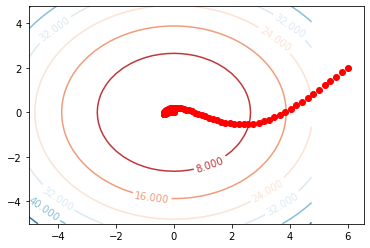

In [134]:
adam = Adam(derivative, init, .2)

print(f'Minimum loss: {adam[0][-1]}')
print(f'Minimum number (x, y) from Adam: {adam[1]}')
print(f'Number of Adam iteration: {adam[2]}')

contour_plot(adam[3], adam[4], init)

## Finding an Extremum Illustration

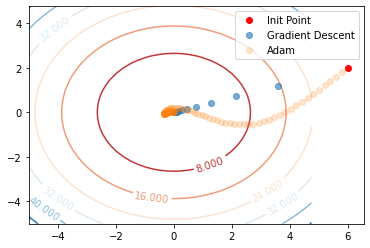

In [124]:
plt.figure(1)
CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
plt.clabel(CS, inline=1, fontsize=10)
# initial point
plt.plot(init[0], init[1], 'ro', label='Init Point')

# gradient descent algorithm
plt.plot(gd[3], gd[4], 'o', label='Gradient Descent', alpha=0.6)

# gradient descent moment
# plt.plot(gdm[2], gdm[3], 'o', label='Momentum', alpha=0.4)

# RMSprop
# plt.plot(rmsprop[2], rmsprop[3], 'o', label='RMSprop', alpha=0.4)

# Adam
plt.plot(adam[3], adam[4], 'o', label='Adam', alpha=0.2)
plt.legend()
plt.show()

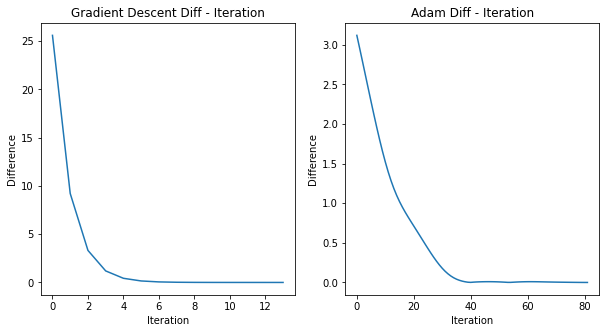

In [147]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(list(range(gd[2])), gd[0])
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.title('Gradient Descent Diff - Iteration')

plt.subplot(1,2,2)
plt.plot(list(range(adam[2])), adam[0])
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.title('Adam Diff - Iteration')

plt.show()